### I have a sample dataset where we have total amount of transaction from 2017 to 2024. Now I will try to build some model to forecast future transaction amount. I will use ARIMA, LSTM and PROPHET model to forecast will see which one is doing better job.<br>In this part, I will use LSTM model.<br>This is part 2.

# Importing Library and dataset

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

In [358]:
df=pd.read_csv('/content/drive/MyDrive/transaction data2.csv')
df.head()

,datetime,trans_count,trans_amount
0,2017-01-01 09:56:10,1,848.0
1,2017-01-01 10:08:41,1,500.0
2,2017-01-01 10:10:37,1,471.0
3,2017-01-01 10:21:16,1,110.0
4,2017-01-01 10:26:19,1,0.0


In [359]:
df1=df[['datetime','trans_amount']]
df1

,datetime,trans_amount
0,2017-01-01 09:56:10,848.0
1,2017-01-01 10:08:41,500.0
2,2017-01-01 10:10:37,471.0
3,2017-01-01 10:21:16,110.0
4,2017-01-01 10:26:19,0.0
...,...,...
11976841,2024-03-31 19:43:23,10.0
11976842,2024-03-31 19:44:09,502.0
11976843,2024-03-31 19:44:20,10.0
11976844,2024-03-31 19:45:04,10.0


In [360]:
df1.rename(columns={'datetime': 'ds','trans_amount': 'y'}, inplace=True)

In [361]:
df1['ds'] = pd.to_datetime(df1['ds'])
df1.head()

,ds,y
0,2017-01-01 09:56:10,848.0
1,2017-01-01 10:08:41,500.0
2,2017-01-01 10:10:37,471.0
3,2017-01-01 10:21:16,110.0
4,2017-01-01 10:26:19,0.0


In [362]:
df1.set_index('ds', inplace=True)

# Resampling data as month starting

In [363]:
ts=df1['y'].resample('MS').sum()
ts

ds
2017-01-01    4.977332e+07
2017-02-01    4.262793e+07
2017-03-01    5.308049e+07
2017-04-01    4.969003e+07
2017-05-01    4.180399e+07
                  ...     
2023-11-01    1.045445e+10
2023-12-01    9.791298e+09
2024-01-01    1.124518e+10
2024-02-01    1.044804e+10
2024-03-01    9.739796e+09
Freq: MS, Name: y, Length: 87, dtype: float64

In [364]:
df3=pd.DataFrame(ts)
df3.head()

,y
ds,
2017-01-01,49773319.66
2017-02-01,42627926.21
2017-03-01,53080485.63
2017-04-01,49690031.66
2017-05-01,41803989.44


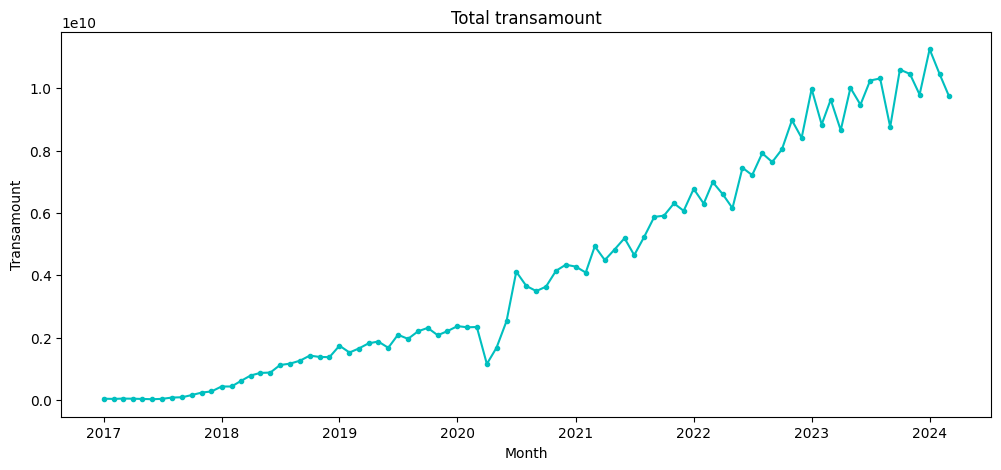

In [365]:
plt.figure(figsize=(12,5))
plt.xlabel("Month")
plt.ylabel("Transamount")
plt.title('Total transamount')
plt.plot(df3.index, df3.y, color = 'c', marker='.')

In [366]:
# Convert the DataFrame to a numpy array
dataset=df3.values
dataset = dataset.astype('int64')

In [367]:
from sklearn.preprocessing import MinMaxScaler

In [368]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [369]:
# Split the data into train and test sets
train = dataset[:round(len(dataset)*80/100)]
len(train)

70

In [370]:
test = dataset[round(len(dataset)*80/100):]
len(test)

17

In [371]:
# Function to create dataset with look back
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [372]:
# Reshape into X=t and Y=t+1
look_back = 6  # Example window size, you can adjust based on your data
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [373]:
# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [374]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [375]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', kernel_initializer='lecun_uniform', input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
64/64 - 2s - loss: 0.0430 - 2s/epoch - 28ms/step
Epoch 2/100
64/64 - 0s - loss: 0.0057 - 152ms/epoch - 2ms/step
Epoch 3/100
64/64 - 0s - loss: 0.0027 - 142ms/epoch - 2ms/step
Epoch 4/100
64/64 - 0s - loss: 0.0019 - 129ms/epoch - 2ms/step
Epoch 5/100
64/64 - 0s - loss: 0.0017 - 127ms/epoch - 2ms/step
Epoch 6/100
64/64 - 0s - loss: 0.0016 - 132ms/epoch - 2ms/step
Epoch 7/100
64/64 - 0s - loss: 0.0016 - 134ms/epoch - 2ms/step
Epoch 8/100
64/64 - 0s - loss: 0.0015 - 147ms/epoch - 2ms/step
Epoch 9/100
64/64 - 0s - loss: 0.0015 - 136ms/epoch - 2ms/step
Epoch 10/100
64/64 - 0s - loss: 0.0014 - 123ms/epoch - 2ms/step
Epoch 11/100
64/64 - 0s - loss: 0.0015 - 139ms/epoch - 2ms/step
Epoch 12/100
64/64 - 0s - loss: 0.0016 - 141ms/epoch - 2ms/step
Epoch 13/100
64/64 - 0s - loss: 0.0014 - 136ms/epoch - 2ms/step
Epoch 14/100
64/64 - 0s - loss: 0.0014 - 128ms/epoch - 2ms/step
Epoch 15/100
64/64 - 0s - loss: 0.0014 - 142ms/epoch - 2ms/step
Epoch 16/100
64/64 - 0s - loss: 0.0014 - 126ms/epoc

In [376]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1/1 [==============================] - 0s 182ms/step


In [377]:
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [378]:
print(trainY[0])
print(trainPredict[:,0])

[4.44971280e+07 8.65641280e+07 9.59858680e+07 1.66565090e+08
 2.46392726e+08 2.81953577e+08 4.40380512e+08 4.40746836e+08
 6.11677494e+08 7.92066507e+08 8.75726390e+08 8.86558434e+08
 1.12762236e+09 1.17301592e+09 1.26761376e+09 1.43023224e+09
 1.38687049e+09 1.38057697e+09 1.74792166e+09 1.52942396e+09
 1.65425402e+09 1.82209035e+09 1.88127360e+09 1.68099804e+09
 2.09860946e+09 1.96605262e+09 2.20772924e+09 2.31801014e+09
 2.08277320e+09 2.21378795e+09 2.37462611e+09 2.33647328e+09
 2.34695574e+09 1.16220776e+09 1.68420646e+09 2.53819003e+09
 4.11901613e+09 3.66234605e+09 3.49736951e+09 3.63924799e+09
 4.14680218e+09 4.34032755e+09 4.28261947e+09 4.09045072e+09
 4.93216982e+09 4.48997539e+09 4.82746847e+09 5.19149944e+09
 4.64927994e+09 5.23732293e+09 5.87414427e+09 5.91216209e+09
 6.30772261e+09 6.06736547e+09 6.77130828e+09 6.29910717e+09
 6.98782090e+09 6.59924871e+09 6.15315877e+09 7.44814874e+09
 7.21190207e+09 7.91352535e+09 7.63088614e+09 8.03757543e+09]
[1.4867078e+08 1.610192

In [379]:
from sklearn.metrics import mean_squared_error

In [380]:
# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 342805058.16 RMSE
Test Score: 954768778.72 RMSE


In [381]:
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [383]:
100-mean_absolute_percentage_error(y_true=trainY[0],
                   y_pred=trainPredict[:,0])

84.20823284596327

In [382]:
100-mean_absolute_percentage_error(y_true=testY[0],
                   y_pred=testPredict[:,0])

92.88348286185665

In [390]:
# Plot the results
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:look_back+len(trainPredict), :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset), :] = testPredict

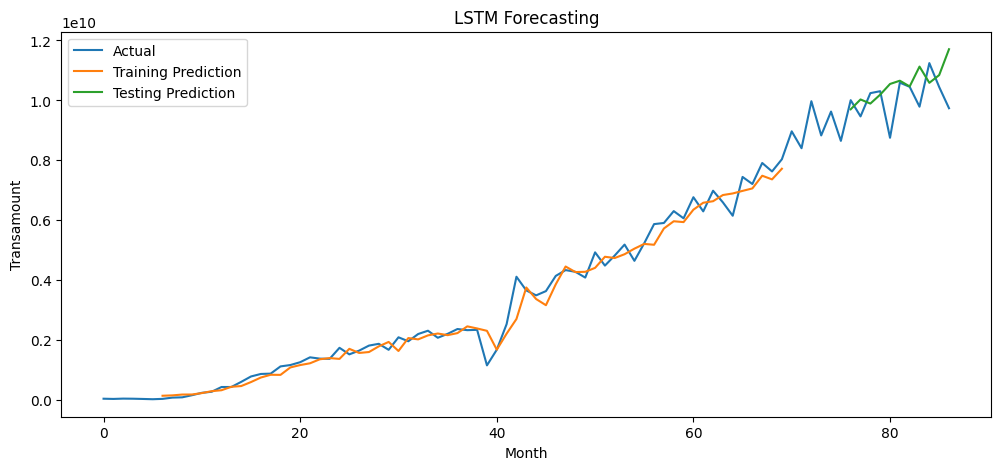

In [389]:
plt.figure(figsize=(12, 5))
plt.plot(scaler.inverse_transform(dataset), label='Actual')
plt.plot(trainPredictPlot, label='Training Prediction')
plt.plot(testPredictPlot, label='Testing Prediction')
plt.xlabel('Month')
plt.ylabel('Transamount')
plt.title('LSTM Forecasting')
plt.legend()
plt.show()

In [387]:
# Forecasting for the years 2024 to 2025
future_years = pd.date_range(start='2024-03-01', end='2024-12-01', freq='MS')

# Create lag features for future years
future_data = df3.tail(look_back).values
future_data = scaler.transform(future_data.reshape(-1, 1)).reshape(1, 1, -1)

# Predict Dengue Cases for future years
future_forecast = []
for i in range(len(future_years)):
    prediction = model.predict(future_data)
    future_forecast.append(prediction[0, 0])
    future_data = np.append(future_data[:, :, 1:], prediction).reshape(1, 1, -1)

# Invert predictions
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

1/1 [==============================] - 0s 30ms/step


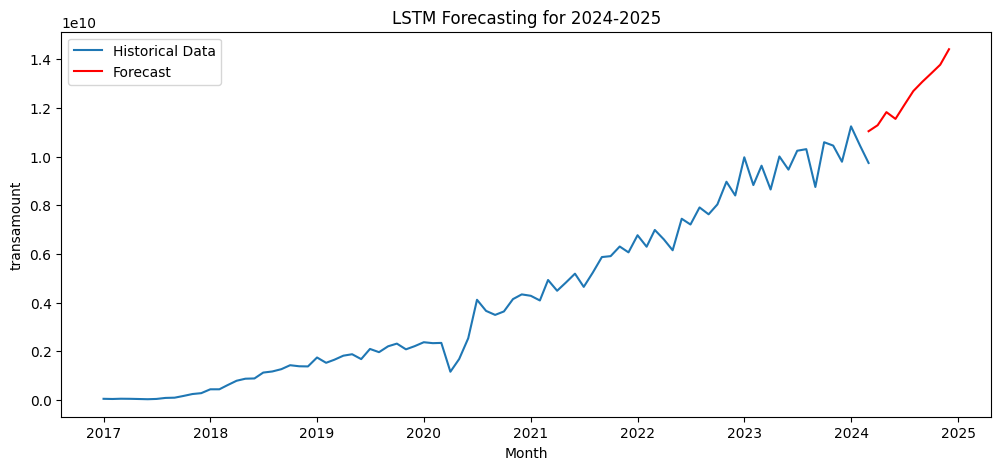

In [391]:
# Plot the forecasted data
plt.figure(figsize=(12, 5))
plt.plot(df3.index, df3['y'], label='Historical Data')
plt.plot(future_years, future_forecast, label='Forecast', color='red')
plt.title('LSTM Forecasting for 2024-2025')
plt.xlabel('Month')
plt.ylabel('transamount')
plt.legend()
plt.show()

# Seems model is working well. Now, in next part I will fit PROPHET model